<a href="https://colab.research.google.com/github/zhafar3adib/belajar_datascience/blob/master/Machine_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library
Import library yang dibutuhkan untuk melakukan proses Machine Learning

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from wordcloud import WordCloud

#Read dataset

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/zhafar3adib/belajar_datascience/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Data Preprocessing


In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dataset memiliki 21 kolom dan 7043 baris, terdapat 3 kolom yang bertipe numerik dan 18 kolom bertipe kategorikal

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data['TotalCharges'].str.contains(r'\s+').sum()

11

Terdapat 11 baris yang memiliki whitespace value yang perlu diganti nilainya

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace([' '],'0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

Mengubah kolom kategorikal menjadi numerik menggunakan label encoder

In [ ]:
categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


#Data Visualization

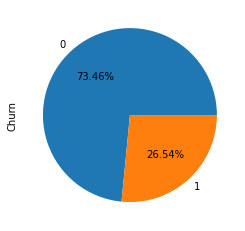

In [ ]:
data['Churn'].value_counts().plot(kind='pie',autopct='%.2f%%')

In [ ]:
data['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#Classification 
Metode - metode yang tersedia untuk klasifikasi

In [ ]:
df_x = data.drop(['customerID',	'Churn'],axis=1)
df_y = data[['Churn']]

x = variabel penting, drop kolom customerID karena unique value dan tidak ada insight yang bisa diambil

y = target class

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

membagi data menjadi training dan testing

In [ ]:
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

scaling data menggunakan metode minmax scaler

##Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy  0.7941315664931378
Precision  0.730998903359562
Recall  0.7028596333370825
Confusion matrix  [[1398  171]
 [ 264  280]]


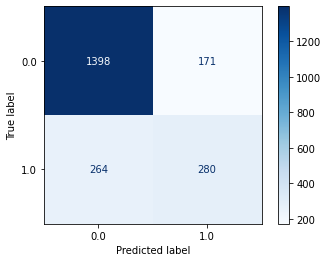

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model=LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Multi-layer Perceptron classifier

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  0.7666824420255561
Precision  0.6950841814518294
Recall  0.6957849463877329
Confusion matrix  [[1321  248]
 [ 245  299]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


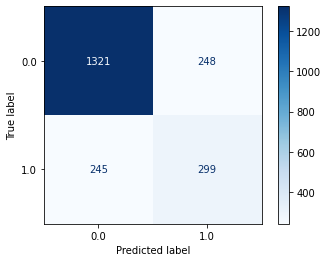

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model=MLPClassifier(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Undersampling

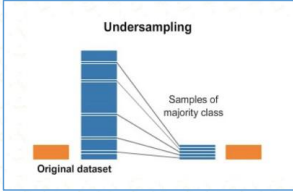

Karena perbandingan jumlah churn atau tidak tidak seimbang, maka diseimbangkan dengan metode undersampling atau mengurangi jumlah class mayoritas agar seimbang dengan class minoritas

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


sebelum random undersampling
Churn
0.0      3605
1.0      1325
dtype: int64
setelah random undersampling
Churn
0.0      1325
1.0      1325
dtype: int64
Accuracy  0.6999526739233317
Precision  0.6710968906391008
Recall  0.7199028511978405
Confusion matrix  [[1065  504]
 [ 130  414]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


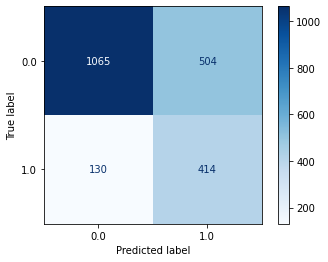

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

under_sampling = RandomUnderSampler(random_state=1)
x_resampled, y_resampled = under_sampling.fit_resample(x_train, y_train)

model=MLPClassifier(max_iter=1000)
model=model.fit(x_resampled, y_resampled)

y_pred = model.predict(x_test)

print('sebelum random undersampling')
print(pd.DataFrame(y_train).value_counts())
print('setelah random undersampling')
print(pd.DataFrame(y_resampled).value_counts())

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues) 
plt.show()

##Oversampling
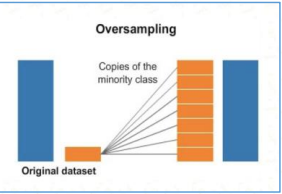

Karena perbandingan jumlah churn atau tidak tidak seimbang, maka diseimbangkan dengan metode overrsampling atau menambah jumlah class minoritas agar seimbang dengan class mayoritas

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


sebelum random oversampling
Churn
0.0      3605
1.0      1325
dtype: int64
setelah random oversampling
Churn
0.0      3605
1.0      3605
dtype: int64
Accuracy  0.738760056791292
Precision  0.6757732693737459
Recall  0.7022017817643309
Confusion matrix  [[1220  349]
 [ 203  341]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


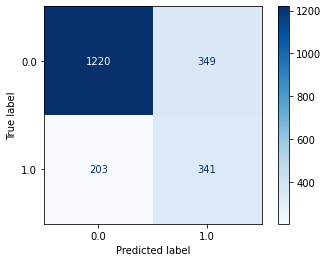

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

over_sampling = RandomOverSampler(random_state=1)
x_resampled, y_resampled = over_sampling.fit_resample(x_train, y_train)

model=MLPClassifier(max_iter=1000)
model=model.fit(x_resampled, y_resampled)

y_pred = model.predict(x_test)

print('sebelum random oversampling')
print(pd.DataFrame(y_train).value_counts())
print('setelah random oversampling')
print(pd.DataFrame(y_resampled).value_counts())

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues) 
plt.show()

##Smote

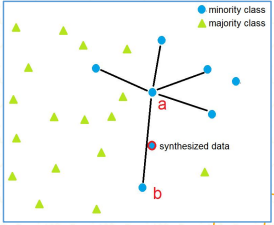

Pendekatan oversampling yang menciptakan sampel kelas
minoritas secara sintetis.

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


sebelum smote
Churn
0.0      3605
1.0      1325
dtype: int64
setelah smote
Churn
0.0      3605
1.0      3605
dtype: int64
Accuracy  0.7510648367250355
Precision  0.6890492062907444
Recall  0.7164917472725227
Confusion matrix  [[1236  333]
 [ 193  351]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


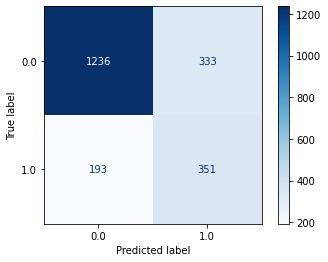

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

smote = SMOTE(random_state=1)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

model=MLPClassifier(max_iter=1000)
model=model.fit(x_resampled, y_resampled)

y_pred = model.predict(x_test)

print('sebelum smote')
print(pd.DataFrame(y_train).value_counts())
print('setelah smote')
print(pd.DataFrame(y_resampled).value_counts())

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues) 
plt.show()

##ADASYN
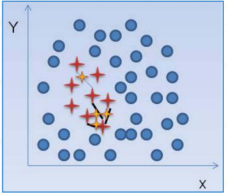

Ide penting dari ADASYN adalah menggunakan
pembobotan untuk contoh kelas minoritas

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


sebelum ADASYN
Churn
0.0      3605
1.0      1325
dtype: int64
setelah ADASYN
Churn
0.0      3605
1.0      3541
dtype: int64
Accuracy  0.7491717936583058
Precision  0.6804890733234683
Recall  0.6972037500468639
Confusion matrix  [[1262  307]
 [ 223  321]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


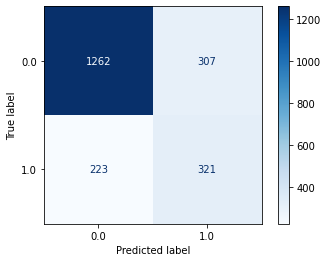

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

adasyn = ADASYN(random_state=0)
x_resampled, y_resampled = adasyn.fit_resample(x_train, y_train)

model=MLPClassifier(max_iter=1000)
model=model.fit(x_resampled, y_resampled)

y_pred = model.predict(x_test)

print('sebelum ADASYN')
print(pd.DataFrame(y_train).value_counts())
print('setelah ADASYN')
print(pd.DataFrame(y_resampled).value_counts())

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues) 
plt.show()

##Nearest Neighbor Classifiers
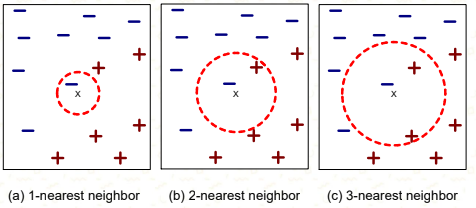

Klasifikasi berdasarkan jumlah kelas tetangga atau data yang terdekat

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy  0.7671557027922385
Precision  0.6901661166421698
Recall  0.6606774641022757
Confusion matrix  [[1381  188]
 [ 304  240]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


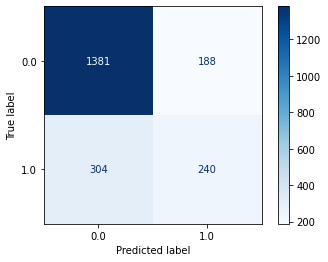

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model=KNeighborsClassifier(n_neighbors=10)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Decision Tree


Accuracy  0.7340274491244676
Precision  0.6540698877748137
Recall  0.6569840053612267
Confusion matrix  [[1280  289]
 [ 273  271]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


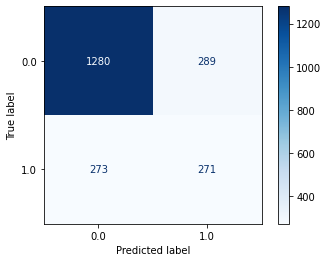

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model=DecisionTreeClassifier(criterion="entropy")
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Random Forest / Bagging

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


Accuracy  0.7856128726928537
Precision  0.7197004568019204
Recall  0.676708422374686
Confusion matrix  [[1414  155]
 [ 298  246]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


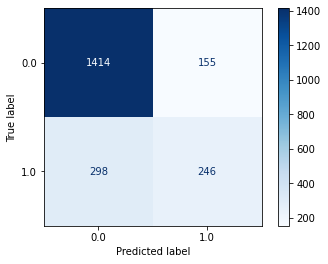

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model=RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Adaboost / Boosting

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  0.7969711310932324
Precision  0.7350117337392572
Recall  0.7083743392194354
Confusion matrix  [[1398  171]
 [ 258  286]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


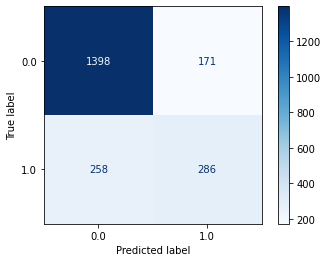

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model=AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Support Vector Machine
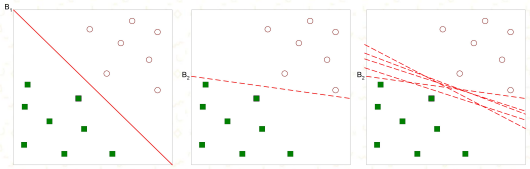

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy  0.7908187411263606
Precision  0.7296846053390834
Recall  0.6772116231769955
Confusion matrix  [[1430  139]
 [ 303  241]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


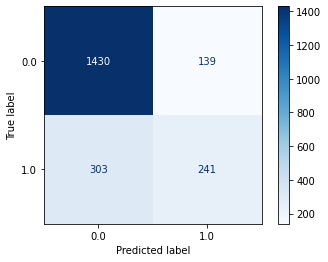

In [ ]:
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

categ = ['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
le = LabelEncoder()
data[categ] = data[categ].apply(le.fit_transform)

scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model=SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

#Multiclass Classification
untuk multiclass kita akan menggunakan dataset yang menggunakan lebih dari 2 class

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/Dry_Bean_Dataset.csv', delimiter=',')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
data.shape

(13611, 17)

In [ ]:
data.drop_duplicates()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

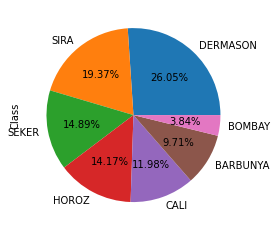

In [ ]:
data['Class'].value_counts().plot(kind='pie',autopct='%.2f%%')

##One vs Rest
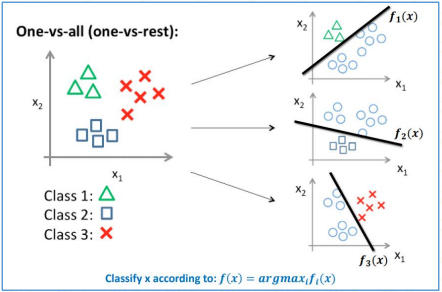

Membagi classifier menjadi jumlah class dan akan melawan yang bukan termasuk class 

Accuracy  0.9275220372184133
Precision  0.9413018646967087
Recall  0.9364714062885074
Confusion matrix  [[352   0  28   0   1   4  10]
 [  0 161   0   0   0   0   0]
 [  9   0 456   0   7   1   6]
 [  0   0   0 957   0  16  70]
 [  1   0   8   5 562   0  12]
 [  5   0   0  15   0 582  17]
 [  2   0   0  65   8   6 718]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


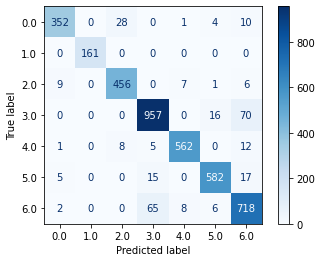

In [ ]:
# data preprocessing dimulai
# membuat X and y. X untuk input variable, y untuk target class
df_x = data.drop(['Class'],axis=1)
df_y = data[['Class']]

#label encoding for y. 
#merubah nilai yg ada di y menjadi angka.
le = LabelEncoder()
df_y= le.fit_transform(df_y['Class'])


#menyimpan X dan y menjadi numpy arrays
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#scaling
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# data preprocessing selesai

#mulai melakukan modelling. model ML learning dari training set 
model=SVC(decision_function_shape='ovr')
model.fit(x_train, y_train)

# membuat prediksi
y_pred = model.predict(x_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##One vs One
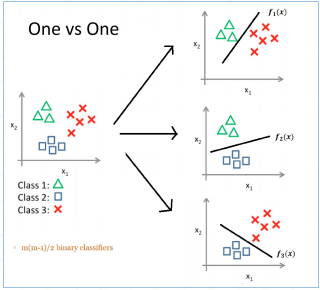

Melawan satu class dengan class lainnya

Accuracy  0.9275220372184133
Precision  0.9413018646967087
Recall  0.9364714062885074
Confusion matrix  [[352   0  28   0   1   4  10]
 [  0 161   0   0   0   0   0]
 [  9   0 456   0   7   1   6]
 [  0   0   0 957   0  16  70]
 [  1   0   8   5 562   0  12]
 [  5   0   0  15   0 582  17]
 [  2   0   0  65   8   6 718]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


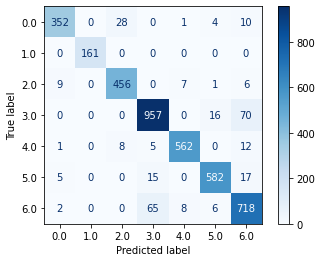

In [ ]:
# data preprocessing dimulai
# membuat X and y. X untuk input variable, y untuk target class
df_x = data.drop(['Class'],axis=1)
df_y = data[['Class']]

#label encoding for y. 
#merubah nilai yg ada di y menjadi angka.
le = LabelEncoder()
df_y= le.fit_transform(df_y['Class'])


#menyimpan X dan y menjadi numpy arrays
x = df_x.astype(float).values
y = df_y.astype(float)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#scaling
scaler = MinMaxScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# data preprocessing selesai

#mulai melakukan modelling. model ML learning dari training set 
model=SVC(decision_function_shape='ovo')
model.fit(x_train, y_train)

# membuat prediksi
y_pred = model.predict(x_test)

#menghitung performa model, dengan accuracy dll
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

#Text Classification
klasifikasi berdasarkan text

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/ganjar87/data_science_practice/main/IMDB_small_size.csv', delimiter=',')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
data['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
data.shape

(10000, 2)

In [ ]:
#resize data karena waktu running yang sangat lama
data_resize = data.iloc[:10]
data_resize.shape

(10, 2)

##Data Cleansing Method for text

###Tokenization
merubah kolom review menjadi list per kata dan menghilangkan kata "movie" dan "film"

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df_text = data_resize['review'].astype(str)
df_class = data_resize['sentiment']
lines = df_text.values.tolist()

list_tokens = list()
for line in lines:
  line = line.replace("movie","")
  line = line.replace("film,","")
  tokens = word_tokenize(line)
  list_tokens.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
list_tokens[0]

['One',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'Oz',
 'episode',
 'you',
 "'ll",
 'be',
 'hooked',
 '.',
 'They',
 'are',
 'right',
 ',',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'me.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'The',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'Oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 ',',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'GO',
 '.',
 'Trust',
 'me',
 ',',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 '.',
 'This',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 ',',
 'sex',
 'or',
 'violence',
 '.',
 'Its',
 'is',
 'hardcore',
 ',',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'word.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'It',
 'is',
 'called',
 'OZ',
 'as',


###Stemming

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


df_text = data_resize['review'].astype(str)
df_class = data_resize['sentiment']
lines = df_text.values.tolist()
list_tokens_stem = list()
porter = PorterStemmer()

for line in lines:
  line = line.replace("movie","")
  line = line.replace("film","")
  line = line.replace("br","")
  tokens = word_tokenize(line)
  # merubah tokens menjadi huruf kecil semua
  tokens = [w.lower() for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  # menghapus stop words
  tokens = [word for word in tokens if not word in stopwords.words()]
  # melakukan stemming
  tokens = [porter.stem(word) for word in tokens]
  list_tokens_stem.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
list_tokens_stem[0]

['review',
 'mention',
 'watch',
 'oz',
 'episod',
 'hook',
 'right',
 'exactli',
 'happen',
 'first',
 'thing',
 'struck',
 'oz',
 'utal',
 'unflinch',
 'scene',
 'violenc',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'heart',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violenc',
 'hardcor',
 'classic',
 'use',
 'call',
 'oz',
 'nicknam',
 'given',
 'oswald',
 'maximum',
 'secur',
 'state',
 'penitentari',
 'focus',
 'mainli',
 'emerald',
 'citi',
 'experiment',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'inward',
 'privaci',
 'high',
 'agenda',
 'citi',
 'home',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffl',
 'death',
 'stare',
 'dodgi',
 'deal',
 'shadi',
 'agreement',
 'never',
 'far',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'goe',
 'show',
 'would',
 'dare',
 'forget',
 'pretti',
 'pictur',
 'paint',
 'mainstream',
 'audienc',
 'forget',
 'charm',
 'forget',
 'romanc',


###Lemmatization

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


df_text = data_resize['review'].astype(str)
df_class = data_resize['sentiment']
lines = df_text.values.tolist()
list_tokens_lemma = list()
lemmatizer = WordNetLemmatizer()

for line in lines:
  line = line.replace("movie","")
  line = line.replace("film","")
  line = line.replace("br","")
  tokens = word_tokenize(line)
  # merubah tokens menjadi huruf kecil semua
  tokens = [w.lower() for w in tokens]
  tokens = [word for word in tokens if word.isalpha()]
  # menghapus stop words
  tokens = [word for word in tokens if not word in stopwords.words()]
  # melakukan lemmatization
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  list_tokens_lemma.append(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
list_tokens_lemma[0]

['reviewer',
 'mentioned',
 'watching',
 'oz',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'oz',
 'utality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'go',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'called',
 'oz',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'city',
 'home',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'go',
 'show',
 'would',
 'dare',
 'forget',
 'pretty',
 'picture',
 'painted',
 'mainstream',
 'audience',
 'fo

##Feature Extraction

###Bag of Words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

new_doc = list()
#ambil dari hasil lemmatization misalnya
for doc in list_tokens_lemma:
  row = ' '.join(doc)
  new_doc.append(row)

vectorizer = CountVectorizer(max_features=1000)
X_input_bow = vectorizer.fit_transform(new_doc)

In [ ]:
print(X_input_bow)

  (0, 368)	1
  (0, 275)	1
  (0, 494)	2
  (0, 307)	6
  (0, 128)	2
  (0, 199)	1
  (0, 370)	2
  (0, 132)	1
  (0, 188)	1
  (0, 151)	2
  (0, 458)	1
  (0, 432)	2
  (0, 479)	1
  (0, 477)	1
  (0, 381)	1
  (0, 484)	4
  (0, 396)	1
  (0, 507)	1
  (0, 172)	2
  (0, 472)	1
  (0, 402)	4
  (0, 141)	1
  (0, 194)	1
  (0, 464)	1
  (0, 346)	1
  :	:
  (8, 190)	1
  (8, 78)	1
  (8, 339)	1
  (8, 170)	1
  (8, 193)	1
  (8, 226)	2
  (8, 239)	1
  (8, 262)	1
  (8, 35)	1
  (8, 121)	1
  (8, 297)	1
  (9, 178)	1
  (9, 129)	1
  (9, 518)	1
  (9, 245)	2
  (9, 253)	1
  (9, 300)	1
  (9, 303)	1
  (9, 185)	1
  (9, 513)	1
  (9, 237)	1
  (9, 195)	1
  (9, 282)	1
  (9, 246)	1
  (9, 43)	1


In [ ]:
new_doc[:10]

['reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz utality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front inwards privacy high agenda city home muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable 

In [ ]:
print(vectorizer.get_feature_names())
print(X_input_bow.toarray())
print(vectorizer.vocabulary_)
print(X_input_bow.shape)

['accustomed', 'acting', 'action', 'actor', 'addiction', 'adrian', 'agenda', 'agreement', 'air', 'aired', 'almost', 'amazing', 'another', 'anxiously', 'anymore', 'appeal', 'arguing', 'around', 'arthur', 'audience', 'average', 'await', 'awakening', 'away', 'awful', 'back', 'bad', 'band', 'basically', 'become', 'believable', 'believe', 'best', 'bette', 'big', 'bit', 'bitch', 'black', 'boogeyman', 'boring', 'boy', 'buscemi', 'called', 'camp', 'career', 'carol', 'case', 'cast', 'cause', 'cell', 'change', 'character', 'charm', 'cheap', 'child', 'chose', 'christian', 'city', 'class', 'classic', 'closet', 'come', 'comeback', 'comedy', 'comfortable', 'comforting', 'comment', 'complete', 'concerning', 'conditioned', 'connect', 'connected', 'contact', 'continued', 'control', 'could', 'country', 'creator', 'credit', 'crooked', 'crown', 'dare', 'darker', 'dated', 'davis', 'dawson', 'dealing', 'death', 'decade', 'decide', 'decides', 'decline', 'decorating', 'dedication', 'delight', 'descent', 'desp

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


###TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
new_doc = list()
# ambil dari hasil lemmatization misalnya
for doc in list_tokens_lemma:
  row = ' '.join(doc)
  new_doc.append(row)

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_input_tfidf = tfidf_vectorizer.fit_transform(new_doc)

In [ ]:
print(X_input_tfidf)

  (0, 403)	0.06681545076170736
  (0, 82)	0.06681545076170736
  (0, 468)	0.06681545076170736
  (0, 482)	0.06681545076170736
  (0, 476)	0.06681545076170736
  (0, 64)	0.06681545076170736
  (0, 29)	0.056799237405597405
  (0, 271)	0.056799237405597405
  (0, 135)	0.06681545076170736
  (0, 409)	0.06681545076170736
  (0, 431)	0.06681545076170736
  (0, 232)	0.06681545076170736
  (0, 36)	0.06681545076170736
  (0, 474)	0.06681545076170736
  (0, 58)	0.06681545076170736
  (0, 278)	0.06681545076170736
  (0, 264)	0.06681545076170736
  (0, 499)	0.0441803009469683
  (0, 23)	0.06681545076170736
  (0, 167)	0.09938524186570431
  (0, 302)	0.06681545076170736
  (0, 228)	0.056799237405597405
  (0, 214)	0.13363090152341472
  (0, 294)	0.06681545076170736
  (0, 413)	0.06681545076170736
  :	:
  (8, 389)	0.1265267875130422
  (8, 463)	0.08838372872676278
  (8, 496)	0.09841666553129526
  (8, 131)	0.11069598777953886
  (8, 120)	0.1265267875130422
  (8, 388)	0.07255292899325944
  (8, 471)	0.09841666553129526
  (8, 28

In [ ]:
new_doc[:10]

['reviewer mentioned watching oz episode hooked right exactly happened first thing struck oz utality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front inwards privacy high agenda city home muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison experience watching oz may become comfortable 

In [ ]:
print(tfidf_vectorizer.get_feature_names())
print(X_input_tfidf.toarray())
print(tfidf_vectorizer.vocabulary_)
print(X_input_tfidf.shape)

['accustomed', 'acting', 'action', 'actor', 'addiction', 'adrian', 'agenda', 'agreement', 'air', 'aired', 'almost', 'amazing', 'another', 'anxiously', 'anymore', 'appeal', 'arguing', 'around', 'arthur', 'audience', 'average', 'await', 'awakening', 'away', 'awful', 'back', 'bad', 'band', 'basically', 'become', 'believable', 'believe', 'best', 'bette', 'big', 'bit', 'bitch', 'black', 'boogeyman', 'boring', 'boy', 'buscemi', 'called', 'camp', 'career', 'carol', 'case', 'cast', 'cause', 'cell', 'change', 'character', 'charm', 'cheap', 'child', 'chose', 'christian', 'city', 'class', 'classic', 'closet', 'come', 'comeback', 'comedy', 'comfortable', 'comforting', 'comment', 'complete', 'concerning', 'conditioned', 'connect', 'connected', 'contact', 'continued', 'control', 'could', 'country', 'creator', 'credit', 'crooked', 'crown', 'dare', 'darker', 'dated', 'davis', 'dawson', 'dealing', 'death', 'decade', 'decide', 'decides', 'decline', 'decorating', 'dedication', 'delight', 'descent', 'desp

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


##Classification models

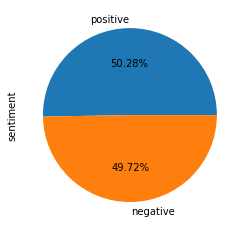

In [ ]:
data['sentiment'].value_counts().plot(kind='pie',autopct='%.2f%%')

###MLP + Bag of Words

Accuracy  0.6666666666666666
Precision  0.3333333333333333
Recall  0.5
Confusion matrix  [[0 1]
 [0 2]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


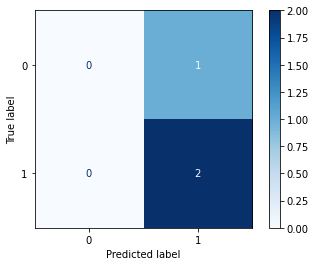

In [ ]:
# get X and y
df_x = X_input_bow
df_y = data_resize['sentiment']

#hold out, dibagi menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)

#mulai learning 
model=MLPClassifier(max_iter=1000)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

###MLP + TF-IDF

Accuracy  0.6666666666666666
Precision  0.3333333333333333
Recall  0.5
Confusion matrix  [[0 1]
 [0 2]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


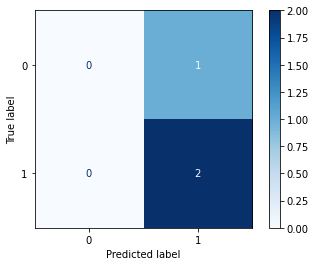

In [ ]:
# get X and y
df_x = X_input_tfidf
df_y = data_resize['sentiment']

#hold out, dibagi menjadi training dan testing set
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)

#label encoding for y
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.fit_transform(y_test)

#mulai learning 
model=MLPClassifier(max_iter=1000)
#model=MLPClassifier(max_iter=1000, random_state=42, activation='logistic')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print('Accuracy ',accuracy_score(y_test, y_pred))    
print('Precision ',precision_score(y_test, y_pred, average='macro'))  
print('Recall ',recall_score(y_test, y_pred, average='macro')) 
print('Confusion matrix ', confusion_matrix(y_test, y_pred)) 
plot_confusion_matrix(model, x_test, y_test, cmap=plt.cm.Blues)  
plt.show()

##Wordcloud

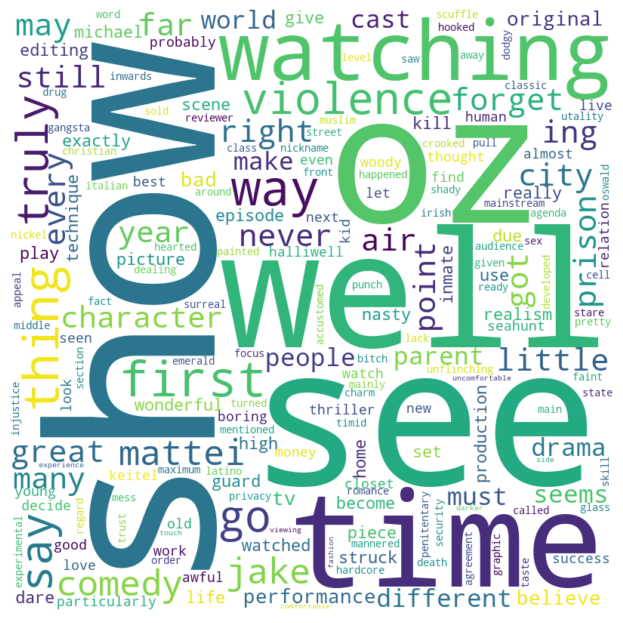

In [ ]:
text = ' '.join(new_doc)
wordcloud = WordCloud(width = 800, height = 800, background_color="white")
wordcloud = wordcloud.generate_from_text(text)
# Display the generated image:
plt.figure(figsize=(8, 8), dpi=100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()